# Relatório Intermediário

Gabriella Cukier

In [1]:
import subprocess
import time
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
def roda_com_entrada(executavel, arquivo_in):
    with open(arquivo_in) as f:
        start = time.perf_counter()
        proc = subprocess.run([f"./exe/{executavel}"], input=f.read(), text=True, capture_output=True)
        end = time.perf_counter()
        
        return(proc.stdout, (end - start))

## Smith Waterman

Esta etapa inicial do projeto implementa a Heurística de Alinhamento Local de Smith-
Waterman, aplicada a duas sequências de DNA fornecidas como input, calculando o score
máximo de alinhamento entre elas. Em seguida, reconstrói o alinhamento local ótimo das
duas sequências.


### Funcionamento

A Heurística de Alinhamento Local de Smith-Waterman consiste em um algoritmo que
segue os seguintes passos:
1. Inicializa uma matriz
n x
m com as linhas e colunas na posição 0 (em ambos os
eixos) contendo o valor 0
2. Para cada 1≤i≤n e 1≤j≤m:
4. Calcula a diagonal de acordo com a seguinte fórmula:
H[i-1,j-1] + w(a[i],b[j])
onde:
        * w(a[i],b[j])=2 se houve match,
        * w(a[i],b[j])= -1 se houve mismatch e
        * w(a[i],b[j])= -1 se houve gap
    
5. Calcula a deleção por meio de H[i-1,j] - 1
6. Calcular a inserção por meio de H[i,j-1] - 1
7. Atribui à posição da matriz H[i,j] o máximo dentre os valores;
       * diagonal
       * deleção
       * inserção
       * 0 (de forma a nunca ser negativo)
8. Por fim, retorna o valor máximo da matriz


Durante a construção da matriz, o caminho seguido foi armazenado em um struct, de
forma que, partindo da posição do score máximo encontrado, foi possível retornar no
caminho, o que permitiu reconstruir as sequências com o melhor alinhamento possível.
Este caminho foi determinado com a seguinte correspondência:
      * deleção = salto de cima para baixo
      * inserção = salto da esquerda para a direita
      * diagonal
Desta forma, foi armazenada no struct a movimentação necessária nos eixos X e Y, de
acordo com a descrição acima, além do valor calculado para cada posição.

### Testes e compilação

As entradas para teste foram geradas por um código fornecido no enunciado, mostrado
abaixo:

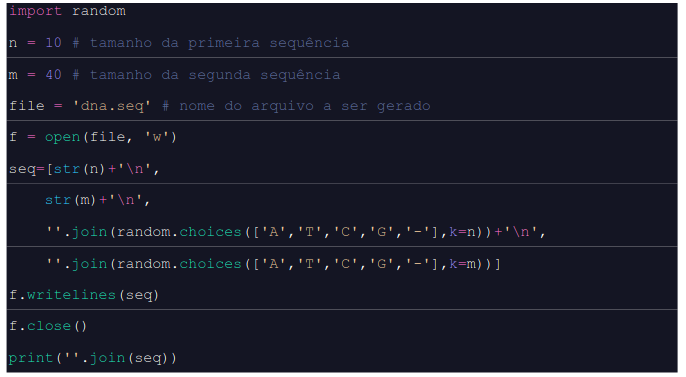

O output deste código foi salvo num arquivo chamado dna.seq, que contém o seguinte formato:


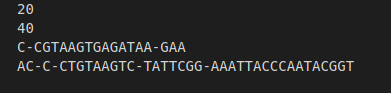

As saídas do código implementado foram armazenadas no arquivo out.txt
Teste dos resultados
Vários testes foram gerados e seus resultados foram comparados aos do site:
https://rna.informatik.uni-freiburg.de/Teaching/index.jsp?toolName=Smith-Waterman

Para rodar o programa, é necessário seguir os seguintes passos:
1. Compilar
         g++ -Wall -O3 proj1.cpp -o proj1
2. Rodar, indicando entradas e saídas
         ./proj1 < dna.seq > out.txt

### Resultados

## Busca local

Esta etapa inicial do projeto implementa a estratégia de Busca Local com Aleatoriedade,
aplicada a duas sequências de DNA fornecidas como input, calculando o score máximo de
alinhamento entre elas, por meio da divisão em subsequências. Tal estratégia de divisão
em problemas menores tem o intuito de diminuir o tempo de processamento,
principalmente para sequências muito grandes

### Funcionamento

O algoritmo funciona por meio dos seguintes passos:
1. Lê duas sequências de DNA com tamanho especificado (a - tamanho n e b - tamanho
m), contidas em um arquivo de entrada
2. Para gerar a subsequência, devemos fornecer um ponto de início da sequência original
(j) e o tamanho que esta subsequência terá (k). Estes valores foram gerados
aleatoriamente, no intervalo:
                    k, 1<=k<=m
e
                     j, 0<=j<=m-k
Por exemplo, se o tamanho sorteado da sequência de entrada AGCACACA for 3 e j=1, teríamos
a seguinte subsequência:

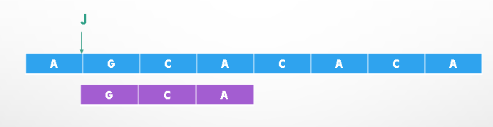

3. Gerou-se um número positivo p, correspondente ao número de subsequências da
entrada a que serão geradas para serem comparadas com sb. Neste projeto, foi
determinado que o valor de p deve estar entre 1 e 100, um limite superior
suficientemente grande para que se obtenha diversidade nas sequências aleatórias
geradas (principalmente para entradas maiores). É esperado que quanto maior o valor
de p, maior a chance de se encontrar um score melhor, porém maior o tempo de
execução. De acordo com a necessidade, os limiares inferior e superior de p podem ser
ajustados.
4. Foi sorteado um número i, 0<=i<=n (correspondente ao ponto de início na sequência
a) e p sequências sa com o tamanho k calculado previamente foram geradas. Estas
sequências foram armazenadas em um vetor para futura comparação de alinhamento.
5. Percorrendo o vetor das subsequências sa armazenadas, foram comparadas as bases
nitrogenadas em cada posição com a posição correspondente da subsequência sb. Os
scores de cada par (sa,sb) foram calculados com os pesos wmat=2, wmis=-1 e wgap=-1
6. O score máximo do cálculo do passo anterior e as subsequências correspondentes a ele
foram armazenados e retornados pela função
7. Para melhorar o valor máximo de score encontrado, o algoritmo foi rodado múltiplas
vezes (100). Tal valor escolhido arbitrariamente segue a mesma lógica de p, ou seja,
quanto maior, maior a chance de se encontrar um score melhor, porém maior o tempo
de execução.

### Resultados

## Busca Exaustiva

### Metodologia

Esta etapa do projeto utilizou a estratégia de Busca Exaustiva, em que uma solução ótima de um problema é encontrada, por meio da geração de todas as soluções possíveis.

Sendo uma entrada composta por duas sequências de DNA (A e B), o código implementado funciona por meio das seguintes etapas:

1. Geração de todas as subsequências de A e de B
2. Cálculo dos alinhamentos de cada par de subsequencias de A e de B (com os pesos wmat, wmis e wgap). Foram utilizadas as seguintes estratégias para o cálculo:

    2.1. Alinhamento pelo método de Smith Waterman

    2.2. Score simples, por meio de uma comparação direta entre as duas subsequências, sendo a maior truncada para que ambas possuam o mesmo tamanho
    
    2.3. Uma mistura das duas estratégias descritas acima, sendo o score simples utilizado no cálculo de quando as sequências possuem o mesmo tamanho e o método de Smith Waterman, caso contrário.

3. A saída do programa será composta do score de alinhamento, além das subsequências correspondentes alinhadas.

### Resultados

#### Metodologia da comparação

Para comparar os desempenhos entre as implementações descritas anteriormente, foram criadas 10 entradas diferentes, com o valor inicial do tamanho da sequência começando em 1 e aumentando de 10 em 10.

Os respectivos resultados de cada programa foram salvos em um dataframe, assim como os tempos de execução correspondentes. Por fim, foram elaborados gráficos comparativos e seus resultados analisados

##### Rodando os executáveis com cada arquivo de entrada

In [6]:
executaveis = ["busca_exaustiva","busca_exaustiva_score_simples","busca_exaustiva_smith_waterman"]
arquivos=[]
for i in range(10):
    arquivos.append(f"dna{i}.seq")

In [7]:
dic={}
for executavel in executaveis:
    dic[executavel] = {
        "results": None,
        "times" : None
    }
    results=[]
    times=[]
    for arquivo_in in arquivos:
        
        desempenho = roda_com_entrada(executavel, f"in_exaustiva/{arquivo_in}")
        results.append(desempenho[0])
        times.append(desempenho[1])

    dic[executavel]["results"] = results
    dic[executavel]["times"] = times


##### Criando um Dataframe

In [8]:
df = pd.DataFrame(dic)
df

,busca_exaustiva,busca_exaustiva_score_simples,busca_exaustiva_smith_waterman
results,"[0, 6, 13, 18, 28, 27, 35, 43, 42, 56]","[0, 5, 7, 11, 16, 16, 13, 15, 13, 12]","[0, 6, 13, 18, 28, 27, 35, 43, 42, 56]"
times,"[0.005696249000038733, 0.007774903999916205, 0...","[0.004130161999910342, 0.003846287999976994, 0...","[0.003657398000086687, 0.005373023999936777, 0..."


In [9]:
# https://www.geeksforgeeks.org/nested-dictionary-to-multiindex-dataframe/
reformed_dict = {}
for outerKey, innerDict in dic.items():
    for innerKey, values in innerDict.items():
        reformed_dict[(outerKey,
                       innerKey)] = values
        
multiIndex_df = pd.DataFrame(reformed_dict)
multiIndex_df

busca_exaustiva             busca_exaustiva_score_simples             \
          results       times                       results      times   
0               0    0.005696                             0   0.004130   
1               6    0.007775                             5   0.003846   
2              13    0.072400                             7   0.014169   
3              18    0.493911                            11   0.066019   
4              28    2.403795                            16   0.235831   
5              27    8.656727                            16   0.590771   
6              35   25.023749                            13   1.438485   
7              43   60.465471                            15   3.219552   
8              42  122.764349                            13   6.617141   
9              56  256.262818                            12  11.713121   

  busca_exaustiva_smith_waterman              
                         results       times  
0                              0    0.003657  
1                              6    0.005373  
2                             13    0.061841  
3                             18    0.466238  
4                             28    2.378550  
5                             27    8.129660  
6                             35   23.966657  
7                             43   59.744993  
8                             42  125.242243  
9                             56  252.072051

##### Gráfico da comparação de tempo

Text(0.5, 1.0, 'Gráfico do tempo em função do tamanho da sequência\n')

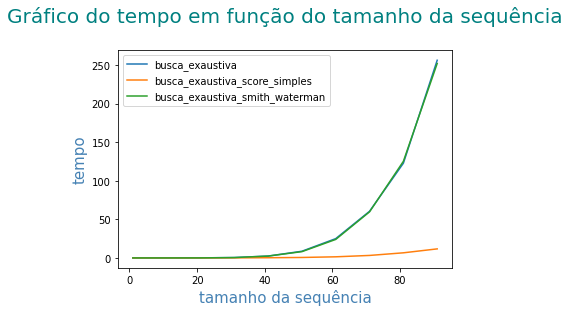

In [11]:
valores=[1]
for i in range (1,10):
    valores.append(valores[i-1]+10)

for exe in df.columns.values.tolist():
    plt.plot(valores,multiIndex_df[exe]["times"].values, label=exe)
plt.legend()
plt.xlabel("tamanho da sequência", 
           fontsize=15,
          color="steelblue")
plt.ylabel("tempo", 
           fontsize=15,
          color="steelblue")
plt.title(label="Gráfico do tempo em função do tamanho da sequência\n",
          fontsize=20,
          color="teal")

##### Gráfico da comparação de valores

Text(0.5, 1.0, 'Gráfico do valor máximo encontrado em função do tamanho da sequência\n')

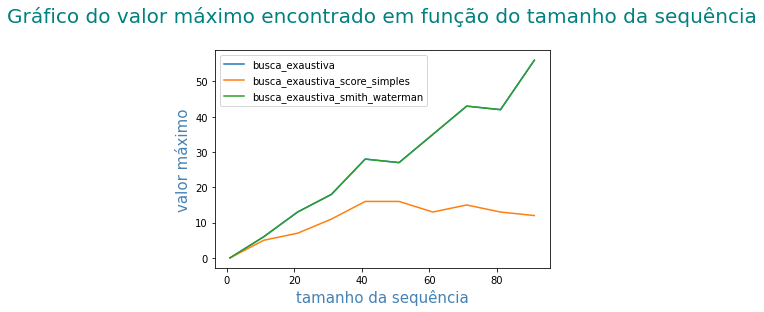

In [12]:
for exe in df.columns.values.tolist():
    plt.plot(valores,multiIndex_df[exe]["results"].values.astype(float), label=exe)
plt.legend()
plt.xlabel("tamanho da sequência", 
           fontsize=15,
          color="steelblue")
plt.ylabel("valor máximo", 
           fontsize=15,
          color="steelblue")
plt.title(label="Gráfico do valor máximo encontrado em função do tamanho da sequência\n",
          fontsize=20,
          color="teal")

### Análise e conclusões

O gráfico do tempo em função do tamanho da sequência mostrou que o desempenho da busca exaustiva com o alinhamento calculado pelo método de Smith Waterman (em verde) teve um desempenho muito similar em termos de velocidade ao método que mesclava Smith Waterman com o cálculo de score simples (em azul). Ambos aparentam possuir complexidade O(n²), apresentando uma curva exponencial

Este resultado condiz com o esperado, pois ao gerar todas as subsequências possíveis e calcular seus respectivos scores, na maior parte das comparações o tamanho entre as sequências será diferente, de forma que na realidade a maior parte dos cálculos se dará pelo próprio método de Smith Waterman. 

Por precisar montar uma matriz e calcular o score em cada posição com dependência dos valores das posições vizinhas, este método é de fato mais demorado. Além disso, ele inclui a reconstrução do alinhamento das sequências, em que um caminho dentro da matriz deve ser percorrido novamente. O processo como um todo é bem mais complexo do que uma comparação simples, feita a partir de uma mesma posição em duas sequências distintas, o que consequentemente eleva significativamente o tempo de processamento.

Além disso, é possível observar que existe um limiar em torno do tamanho da sequência igual a 40, a partir do qual o tempo de processamento dos programas com o uso do método de Smith Waterman cresce mais.

Ou seja, a partir de tal limiar, a utilização de tais métodos pode apresentar desvantagens em relação ao tempo de processamento, sendo que quanto maior o tamanho da sequência, pior será o desempenho.

Contudo, estes métodos apresentaram vantagens em relação ao desempenho, como mostra o gráfico do valor máximo encontrado em função do tamanho da sequência.

Para tamanhos de sequência menores (cerca de abaixo de 10), os resultados do alinhamento calculado por Smith Waterman e pelo método de alinhamento simples não diferiram significativamente. Porém, conforme o tamanho da sequência aumenta, o gráfico mostra que o cálculo por score simples possui um desempenho nitidamente inferior. Isso se dá pelo fato deste método não considerar os gaps no alinhamento, conforme é calculado no método de Smith Waterman.

## Comparação entre as implementações

In [26]:
executaveis = ["smith-waterman","busca-local"]
arquivos=[]
for i in range(17):
    arquivos.append(f"dna{i}.seq")

In [27]:
dic={}
for executavel in executaveis:
    dic[executavel] = {
        "results": None,
        "times" : None
    }
    results=[]
    times=[]
    for arquivo_in in arquivos:
        
        desempenho = roda_com_entrada(executavel, f"in/{arquivo_in}")
        results.append(desempenho[0])
        times.append(desempenho[1])
    
    dic[executavel]["results"] = results
    dic[executavel]["times"] = times

In [28]:
df = pd.DataFrame(dic)
df

,smith-waterman,busca-local
results,"[7, 37, 52, 94, 118, 153, 184, 197, 235, 282, ...","[5, 15, 8, 13, 15, 14, 11, 11, 7, 8, 11, 8, 18..."
times,"[0.006529726000280789, 0.00490941499992914, 0....","[0.005698210999980802, 0.007270764999702806, 0..."


In [29]:
# https://www.geeksforgeeks.org/nested-dictionary-to-multiindex-dataframe/
reformed_dict = {}
for outerKey, innerDict in dic.items():
    for innerKey, values in innerDict.items():
        reformed_dict[(outerKey,
                       innerKey)] = values
        
multiIndex_df = pd.DataFrame(reformed_dict)
multiIndex_df

smith-waterman           busca-local          
          results     times     results     times
0               7  0.006530           5  0.005698
1              37  0.004909          15  0.007271
2              52  0.005065           8  0.010753
3              94  0.005632          13  0.013961
4             118  0.005562          15  0.016875
5             153  0.005096          14  0.019573
6             184  0.006821          11  0.023159
7             197  0.006897          11  0.026182
8             235  0.007307           7  0.028722
9             282  0.008343           8  0.032163
10            313  0.009493          11  0.035611
11            316  0.010615           8  0.038104
12            333  0.011814          18  0.042513
13            396  0.013297          11  0.046098
14            407  0.014810           7  0.048390
15            439  0.016309           9  0.057948
16            488  0.017542           9  0.053967

Text(0, 0.5, 'tempo')

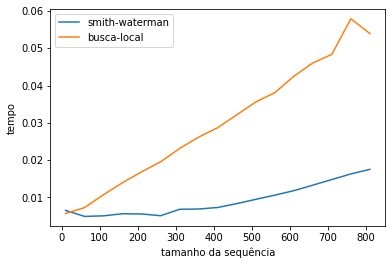

In [32]:
valores=[10]
for i in range (1,17):
    valores.append(valores[i-1]+50)
    
for exe in df.columns.values.tolist():
    plt.plot(valores,multiIndex_df[exe]["times"].values.astype(float), label=exe)
plt.legend()
plt.xlabel("tamanho da sequência")
plt.ylabel("tempo")

Text(0, 0.5, 'valor máximo')

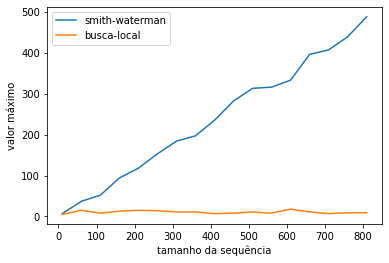

In [33]:
for exe in df.columns.values.tolist():
    plt.plot(valores,multiIndex_df[exe]["results"].values.astype(float), label=exe)
plt.legend()
plt.xlabel("tamanho da sequência")
plt.ylabel("valor máximo")